In [41]:
# Import 
import numpy as np
from math import comb
from typing import Union
from matplotlib import pyplot as plt

## Exercise 2M1
### Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for $p$.

1. W, W, W
2. W, W, W, L
3. L, W, W, L, W, W, W


In [2]:
def simulate_globe_tossing(
    num_tosses: int, p_water: float = 0.5
) -> list:
    """Simulate globe tossing

    Model globe tossing as a binomial distribution. A 'p_water' proportion of the globe is covered by water, while the rest ('1 - p_water') is covered by land. The simulation produces a 'num_tosses'-long sequence of samples drawn from a binomial distribution with parameter 'p_water".

    Parameters
    ----------
    num_tosses : int
    Number of tosses of the globe
    p_water : float
    Proportion of the globe covered by water (used as the parameter for the binomial distribution).

    Returns
    --------
    list
        A list with the resulting samples, e.g. ['W', 'W', 'L']
    """
    rng = np.random.default_rng(1)
    samples = rng.choice(
        ["W", "L"], num_tosses, replace=True, p=[p_water, 1 - p_water]
    )
    return samples

In [14]:
assert np.array(
    [i == 'L' for i in simulate_globe_tossing(10, p_water=0)]
).all()
assert np.array(
    [i == 'W' for i in simulate_globe_tossing(10, p_water=1)]
).all()

In [11]:
simulate_globe_tossing(num_tosses = 10, p_water = 0.5)

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1')

In [32]:
def posterior(
    data: str,
    grid_resolution: int = 10,
    prior: Union[np.array, None] = None,
) -> list:

    if prior is not None:
        if len(prior) != grid_resolution:
                raise ValueError(
                        "the length of the prior must be equal to the grid_resolution"
                )
    else: # assume a uniform prior
        prior = np.ones(grid_resolution)

    possible_ps = np.linspace(0, 1, grid_resolution)
    n = len(data)
    nW = len(data.replace("L", ""))
    nL = n - nW
    likelihood = comb(n, nW) * (possible_ps**nW) * (1 - possible_ps)**nL
    updated_likelihood = prior * likelihood
    return possible_ps, (updated_likelihood / updated_likelihood.sum())

In [33]:
x, y = posterior('WLWWWLLLLWW', 5, np.array([0,0.9, 0.05, 0, 1]))
for i in range(len(x)):
    print(f"{x[i]}\t{y[i]:.2f}")

0.0	0.00
0.25	0.68
0.5	0.32
0.75	0.00
1.0	0.00


0.0	0.00
0.010101010101010102	0.00
0.020202020202020204	0.00
0.030303030303030304	0.00
0.04040404040404041	0.00
0.05050505050505051	0.00
0.06060606060606061	0.00
0.07070707070707072	0.00
0.08080808080808081	0.00
0.09090909090909091	0.00
0.10101010101010102	0.00
0.11111111111111112	0.00
0.12121212121212122	0.00
0.13131313131313133	0.00
0.14141414141414144	0.00
0.15151515151515152	0.00
0.16161616161616163	0.00
0.17171717171717174	0.00
0.18181818181818182	0.00
0.19191919191919193	0.00
0.20202020202020204	0.00
0.21212121212121213	0.00
0.22222222222222224	0.00
0.23232323232323235	0.00
0.24242424242424243	0.00
0.25252525252525254	0.00
0.26262626262626265	0.00
0.27272727272727276	0.00
0.2828282828282829	0.00
0.29292929292929293	0.00
0.30303030303030304	0.00
0.31313131313131315	0.00
0.32323232323232326	0.00
0.33333333333333337	0.00
0.3434343434343435	0.00
0.3535353535353536	0.00
0.36363636363636365	0.00
0.37373737373737376	0.00
0.38383838383838387	0.00
0.393939393939394	0.00
0.4040404040404041

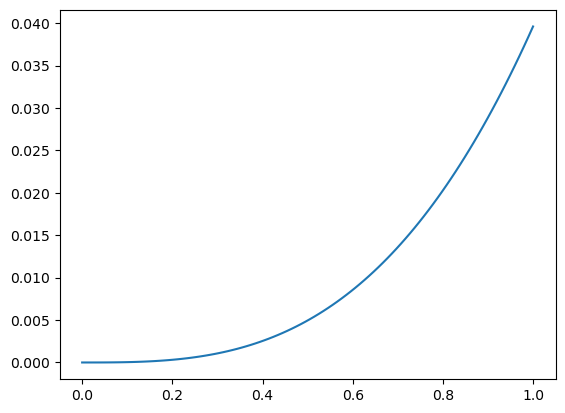

In [54]:
x, y = posterior('WWW', 100)
for i in range(len(x)):
    print(f"{x[i]}\t{y[i]:.2f}")

plt.plot(x, y)

0.0	0.00
0.010101010101010102	0.00
0.020202020202020204	0.00
0.030303030303030304	0.00
0.04040404040404041	0.00
0.05050505050505051	0.00
0.06060606060606061	0.00
0.07070707070707072	0.00
0.08080808080808081	0.00
0.09090909090909091	0.00
0.10101010101010102	0.00
0.11111111111111112	0.00
0.12121212121212122	0.00
0.13131313131313133	0.00
0.14141414141414144	0.00
0.15151515151515152	0.00
0.16161616161616163	0.00
0.17171717171717174	0.00
0.18181818181818182	0.00
0.19191919191919193	0.00
0.20202020202020204	0.00
0.21212121212121213	0.00
0.22222222222222224	0.00
0.23232323232323235	0.00
0.24242424242424243	0.00
0.25252525252525254	0.00
0.26262626262626265	0.00
0.27272727272727276	0.00
0.2828282828282829	0.00
0.29292929292929293	0.00
0.30303030303030304	0.00
0.31313131313131315	0.00
0.32323232323232326	0.00
0.33333333333333337	0.00
0.3434343434343435	0.01
0.3535353535353536	0.01
0.36363636363636365	0.01
0.37373737373737376	0.01
0.38383838383838387	0.01
0.393939393939394	0.01
0.4040404040404041

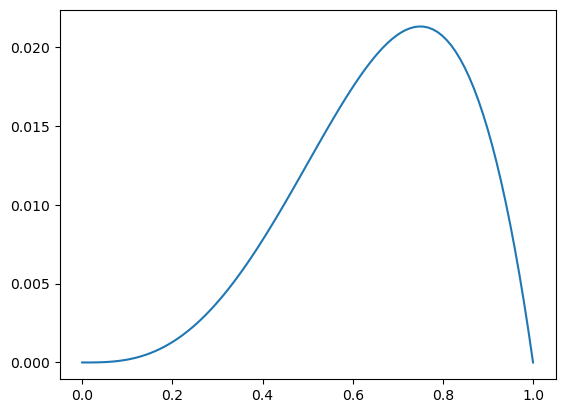

In [53]:
x, y = posterior('WWWL', 100)
for i in range(len(x)):
    print(f"{x[i]}\t{y[i]:.2f}")

plt.plot(x, y)

0.0	0.00
0.010101010101010102	0.00
0.020202020202020204	0.00
0.030303030303030304	0.00
0.04040404040404041	0.00
0.05050505050505051	0.00
0.06060606060606061	0.00
0.07070707070707072	0.00
0.08080808080808081	0.00
0.09090909090909091	0.00
0.10101010101010102	0.00
0.11111111111111112	0.00
0.12121212121212122	0.00
0.13131313131313133	0.00
0.14141414141414144	0.00
0.15151515151515152	0.00
0.16161616161616163	0.00
0.17171717171717174	0.00
0.18181818181818182	0.00
0.19191919191919193	0.00
0.20202020202020204	0.00
0.21212121212121213	0.00
0.22222222222222224	0.00
0.23232323232323235	0.00
0.24242424242424243	0.00
0.25252525252525254	0.00
0.26262626262626265	0.00
0.27272727272727276	0.00
0.2828282828282829	0.00
0.29292929292929293	0.00
0.30303030303030304	0.00
0.31313131313131315	0.00
0.32323232323232326	0.00
0.33333333333333337	0.00
0.3434343434343435	0.00
0.3535353535353536	0.00
0.36363636363636365	0.00
0.37373737373737376	0.00
0.38383838383838387	0.00
0.393939393939394	0.00
0.4040404040404041

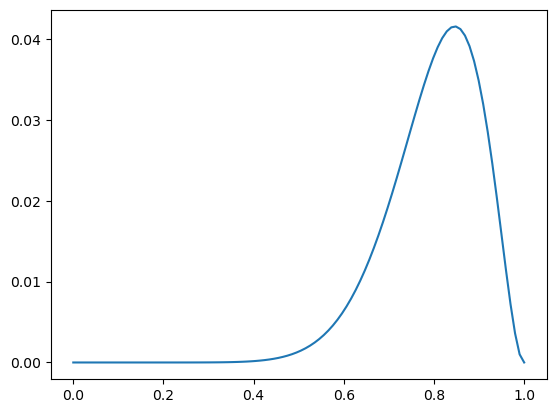

In [52]:
x, y = posterior('L,W,W,L,W,W,W', 100)
for i in range(len(x)):
    print(f"{x[i]}\t{y[i]:.2f}")

plt.plot(x,y)

### Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.